In [27]:
# Import necessary libraries for data processing, visualization, and model building
import pandas as pd  # Data manipulation and analysis
import numpy as np  # Numerical computations
import matplotlib.pyplot as plt  # Data visualization
import seaborn as sns  # Statistical data visualization
# Natural Language Processing (NLP) libraries
from nltk.corpus import stopwords  # List of common words to remove from text
from wordcloud import WordCloud  # Word cloud visualization
import datetime  # Handling time-based data
from nltk.tokenize import word_tokenize  # Tokenization of text data
from nltk.stem import WordNetLemmatizer  # Lemmatization (reducing words to root form)
from textblob import TextBlob  # Sentiment analysis tool
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
# Machine Learning libraries
from sklearn.model_selection import train_test_split  # Splitting data into training and testing sets
from sklearn.feature_extraction.text import TfidfVectorizer  # Transforming text into numerical features using TF-IDF
from sklearn.naive_bayes import MultinomialNB  # Naive Bayes model for text classification
from sklearn.metrics import classification_report, accuracy_score  # Model evaluation metrics
from sklearn.pipeline import make_pipeline  # Pipeline for combining preprocessing and modeling
import warnings  # Warnings module is used to manage warnings in the code
warnings.filterwarnings("ignore")  # This line suppresses warnings to avoid clutter in the output


In [28]:
df = pd.read_csv('/content/Amazon Review.csv', encoding='ISO-8859-1')
df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
24517,24518,B0016JJEFG,AO9WE22147CRH,Arvind Rajan,0,0,1,1351209600,bad tasting tea,We drink a lot of tea... from all over the wor...
24518,24519,B0016JJEFG,A32Y9N4O4F81WJ,M. Shaw,0,0,2,1350691200,Nothing to it,I was overjoyed to find an organic black tea a...
24519,24520,B0016JJEFG,AVXIYQWPPXYF7,titus2.5,0,0,5,1349222400,Great product!,I use this tea when making my Kombucha. Great...
24520,24521,B0016JJEFG,A2YP2C35X0HH7K,Katie Jones,0,0,5,1346889600,Delicious Organic tea for a great price,We go through a lot of tea because we use four...


In [29]:
df.describe()## summary

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,24522.000000,24522.000000,24522.000000,24522.000000,2.452200e+04
mean,12261.500000,1.555338,2.012886,4.147133,1.294335e+09
std,7079.035987,5.406978,6.046892,1.312125,4.700604e+07
min,1.000000,0.000000,0.000000,1.000000,9.617184e+08
25%,6131.250000,0.000000,0.000000,4.000000,1.268006e+09
50%,12261.500000,0.000000,1.000000,5.000000,1.308096e+09
75%,18391.750000,1.000000,2.000000,5.000000,1.329523e+09
max,24522.000000,202.000000,219.000000,5.000000,1.351210e+09


In [30]:
# Checking for missing values
print(df.isnull().sum())

# Filling or dropping missing values
df['HelpfulnessNumerator'].fillna(0, inplace=True)
df['HelpfulnessDenominator'].fillna(0, inplace=True)
df['Text'].fillna("No Review", inplace=True)



Id                        0
ProductId                 0
UserId                    0
ProfileName               1
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64


In [31]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [32]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [33]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [34]:
# 2. Data Preprocessing
# Tokenizing and Lemmatizing the text data
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    words = word_tokenize(text.lower())
    words = [lemmatizer.lemmatize(word) for word in words if word.isalnum() and word not in stop_words]
    return ' '.join(words)

df['cleaned_text'] = df['Text'].apply(preprocess_text)


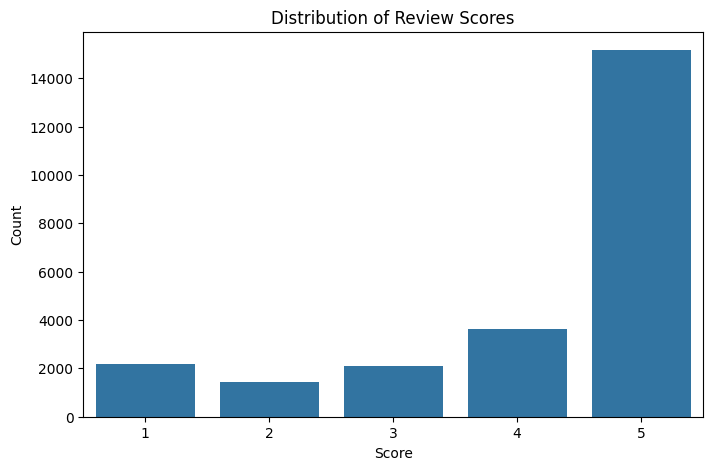

In [35]:
# 3. Exploratory Data Analysis (EDA)
# Distribution of scores
plt.figure(figsize=(8, 5))
sns.countplot(x='Score', data=df)
plt.title('Distribution of Review Scores')
plt.xlabel('Score')
plt.ylabel('Count')
plt.show()





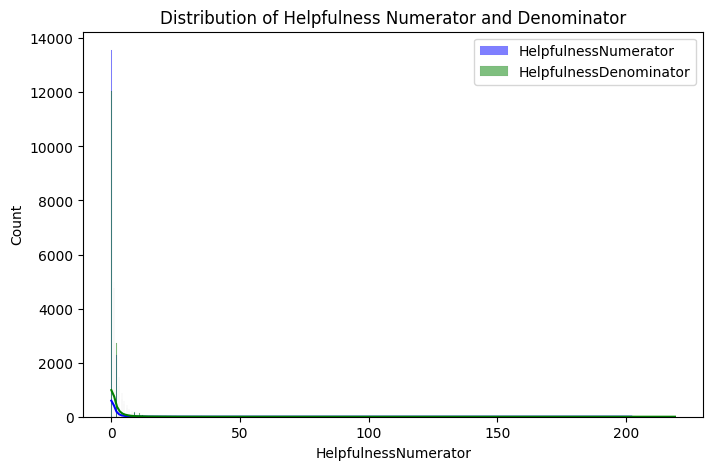

In [36]:
# Distribution of helpfulness (numerator and denominator)
plt.figure(figsize=(8, 5))
sns.histplot(df['HelpfulnessNumerator'], kde=True, color='blue', label='HelpfulnessNumerator')
sns.histplot(df['HelpfulnessDenominator'], kde=True, color='green', label='HelpfulnessDenominator')
plt.legend()
plt.title('Distribution of Helpfulness Numerator and Denominator')
plt.show()


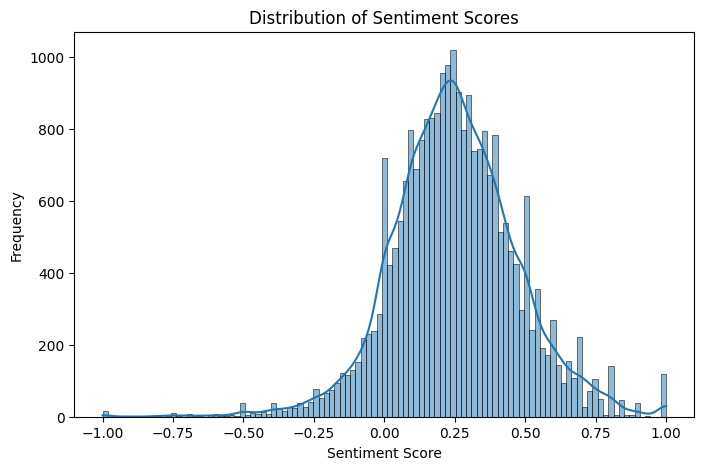

In [37]:
# 4. Sentiment Analysis on Reviews
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

df['sentiment'] = df['cleaned_text'].apply(get_sentiment)

# Visualizing sentiment
plt.figure(figsize=(8, 5))
sns.histplot(df['sentiment'], kde=True)
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

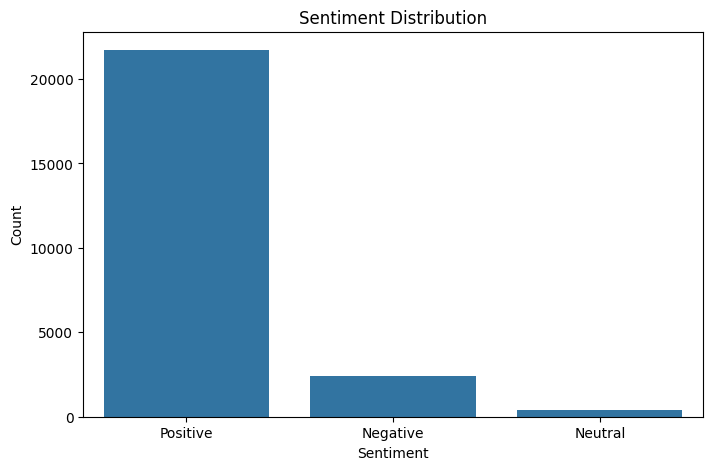

In [38]:
# Categorizing sentiments as Positive, Negative, or Neutral
df['sentiment_label'] = df['sentiment'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))
# Sentiment label distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='sentiment_label', data=df)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

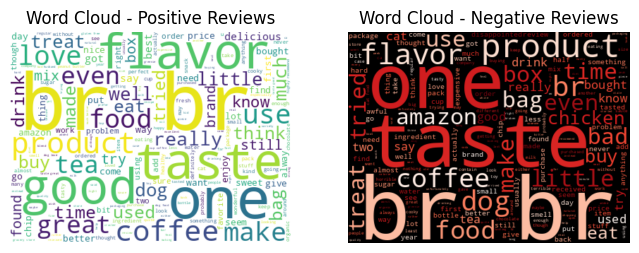

In [39]:
from wordcloud import WordCloud
import datetime
# 1. Word Cloud for Positive and Negative Reviews
positive_text = " ".join(df[df['sentiment_label'] == 'Positive']['cleaned_text'])
negative_text = " ".join(df[df['sentiment_label'] == 'Negative']['cleaned_text'])
plt.figure(figsize=(8,4))
# Positive Reviews Word Cloud
plt.subplot(1, 2, 1)
wordcloud_positive = WordCloud(width=400, height=300, background_color="white").generate(positive_text)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud - Positive Reviews")
# Negative Reviews Word Cloud
plt.subplot(1, 2, 2)
wordcloud_negative = WordCloud(width=400, height=300, background_color="black", colormap="Reds").generate(negative_text)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud - Negative Reviews")
plt.show()

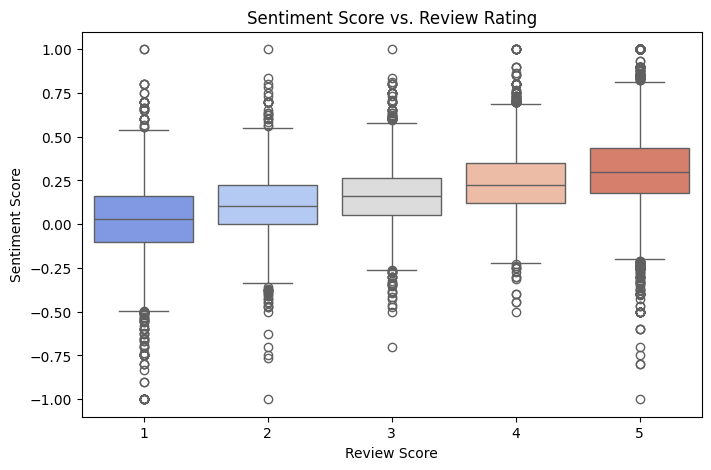

In [40]:
# 2. Sentiment Score vs. Review Score
plt.figure(figsize=(8, 5))
sns.boxplot(x='Score', y='sentiment', data=df, palette="coolwarm")
plt.title("Sentiment Score vs. Review Rating")
plt.xlabel("Review Score")
plt.ylabel("Sentiment Score")
plt.show()


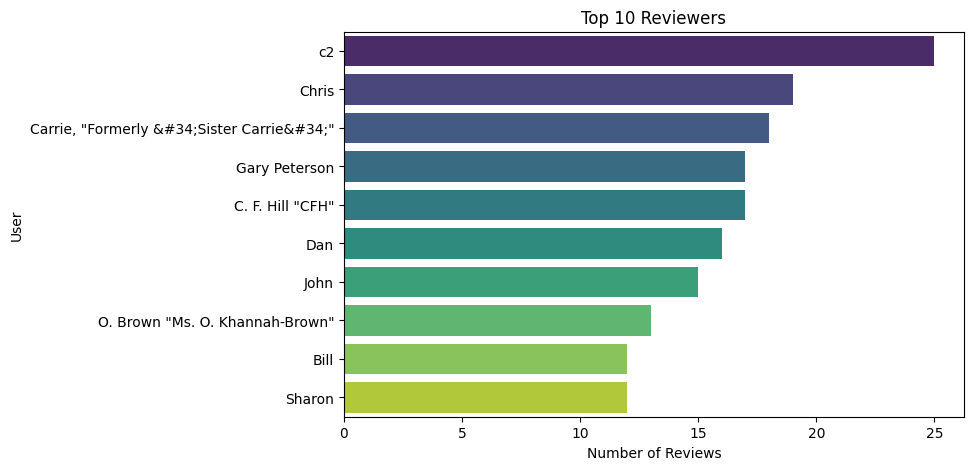

In [41]:
# 3. Top Reviewers (Users who wrote the most reviews)
top_reviewers = df['ProfileName'].value_counts().head(10)
plt.figure(figsize=(8, 5))
sns.barplot(x=top_reviewers.values, y=top_reviewers.index, palette="viridis")
plt.title("Top 10 Reviewers")
plt.xlabel("Number of Reviews")
plt.ylabel("User")
plt.show()


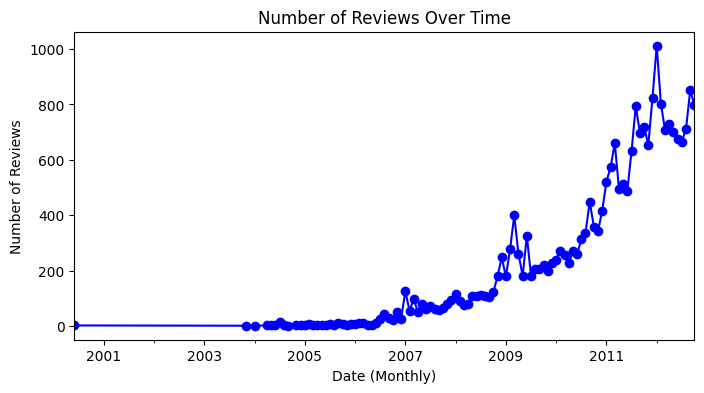

In [42]:
# 5. Time-Based Analysis (Number of Reviews Over Time)
df['review_time'] = pd.to_datetime(df['Time'], unit='s')
df_time = df.groupby(df['review_time'].dt.to_period("M")).count()['Id']
plt.figure(figsize=(8,4))
df_time.plot(color='blue', marker="o")
plt.title("Number of Reviews Over Time")
plt.xlabel("Date (Monthly)")
plt.ylabel("Number of Reviews")
plt.show()

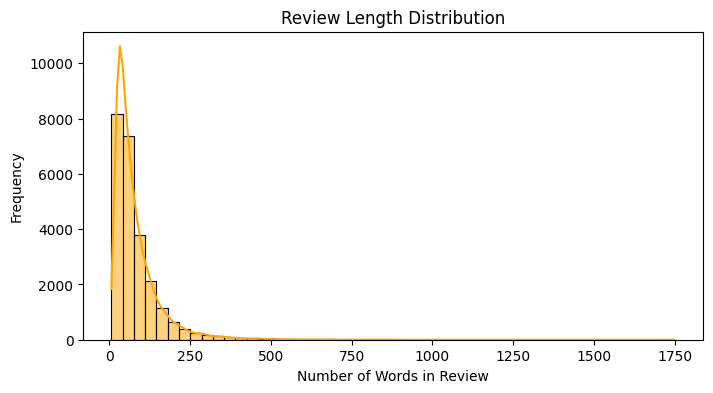

In [43]:
# 6. Review Length Distribution
df['review_length'] = df['Text'].apply(lambda x: len(x.split()))
plt.figure(figsize=(8,4))
sns.histplot(df['review_length'], bins=50, kde=True, color="orange")
plt.title("Review Length Distribution")
plt.xlabel("Number of Words in Review")
plt.ylabel("Frequency")
plt.show()

In [44]:
# 5. Model Building: Predicting Sentiment using Naive Bayes

# Features and Labels
X = df['cleaned_text']
y = df['sentiment_label']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [45]:
from sklearn.metrics import cohen_kappa_score, roc_auc_score, roc_curve
# Build a pipeline for text classification using TF-IDF and Naive Bayes
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

# Train the model
model.fit(X_train, y_train)

# Predictions on the test set
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Get probability scores for ROC-AUC

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
kappa = cohen_kappa_score(y_test, y_pred)  # Kappa Score

# Print classification report
print("Model Performance Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Kappa Score: {kappa:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Compute ROC-AUC score (for binary classification)
if len(set(y_test)) == 2:  # Ensure binary classification
    auc_score = roc_auc_score(y_test, y_pred_proba)
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

    # Plot AUC-ROC Curve
    plt.figure(figsize=(6,4))
    plt.plot(fpr, tpr, color="blue", label=f"ROC Curve (AUC = {auc_score:.4f})")
    plt.plot([0, 1], [0, 1], linestyle="--", color="red")  # Random classifier line
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend()
    plt.show()

    print(f"AUC-ROC Score: {auc_score:.4f}")

# Example Prediction
sample_review = ["This product is amazing, I love it!"]
predicted_sentiment = model.predict(sample_review)
print(f"\nPredicted Sentiment for Sample Review: {predicted_sentiment[0]}")


Model Performance Metrics:
Accuracy: 0.8919
Kappa Score: 0.0000

Classification Report:
               precision    recall  f1-score   support

    Negative       0.00      0.00      0.00       450
     Neutral       0.00      0.00      0.00        80
    Positive       0.89      1.00      0.94      4375

    accuracy                           0.89      4905
   macro avg       0.30      0.33      0.31      4905
weighted avg       0.80      0.89      0.84      4905


Predicted Sentiment for Sample Review: Positive



Training Model: Naive Bayes...
Accuracy: 0.8919
Kappa Score: 0.0000

Classification Report:
               precision    recall  f1-score   support

    Negative       0.00      0.00      0.00       450
     Neutral       0.00      0.00      0.00        80
    Positive       0.89      1.00      0.94      4375

    accuracy                           0.89      4905
   macro avg       0.30      0.33      0.31      4905
weighted avg       0.80      0.89      0.84      4905



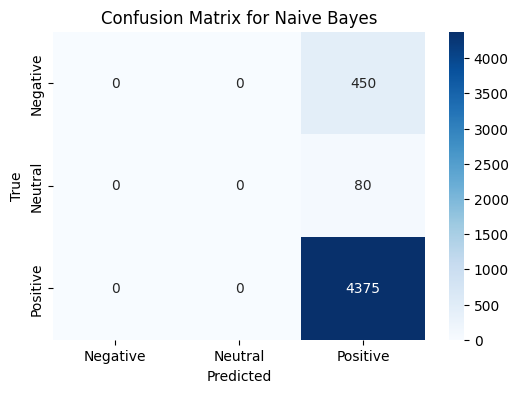


Predicted Sentiment for Sample Review: Positive

Training Model: Logistic Regression...
Accuracy: 0.9138
Kappa Score: 0.3191

Classification Report:
               precision    recall  f1-score   support

    Negative       0.96      0.24      0.39       450
     Neutral       0.00      0.00      0.00        80
    Positive       0.91      1.00      0.95      4375

    accuracy                           0.91      4905
   macro avg       0.63      0.41      0.45      4905
weighted avg       0.90      0.91      0.89      4905



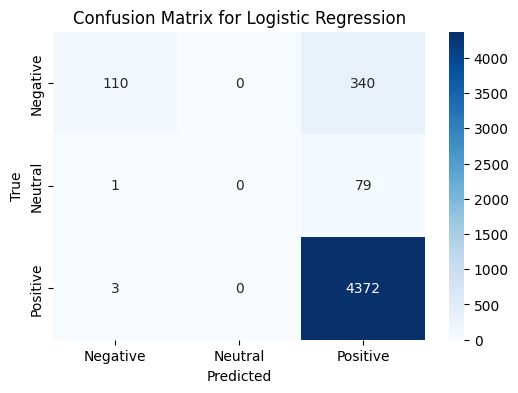


Predicted Sentiment for Sample Review: Positive

Training Model: Random Forest...
Accuracy: 0.9078
Kappa Score: 0.2558

Classification Report:
               precision    recall  f1-score   support

    Negative       0.89      0.18      0.29       450
     Neutral       1.00      0.09      0.16        80
    Positive       0.91      1.00      0.95      4375

    accuracy                           0.91      4905
   macro avg       0.93      0.42      0.47      4905
weighted avg       0.91      0.91      0.88      4905



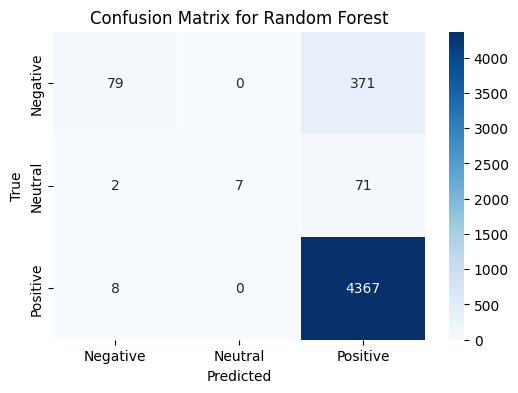


Predicted Sentiment for Sample Review: Positive

Training Model: Gradient Boosting...
Accuracy: 0.9107
Kappa Score: 0.3266

Classification Report:
               precision    recall  f1-score   support

    Negative       0.83      0.27      0.40       450
     Neutral       0.20      0.01      0.02        80
    Positive       0.91      0.99      0.95      4375

    accuracy                           0.91      4905
   macro avg       0.65      0.42      0.46      4905
weighted avg       0.89      0.91      0.89      4905



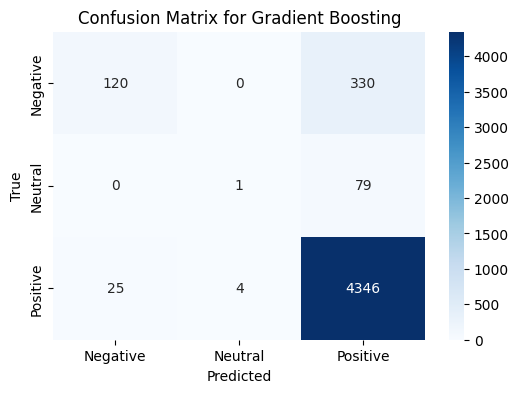


Predicted Sentiment for Sample Review: Positive

=== Model Performance Summary ===

Naive Bayes:
Accuracy: 0.8919
Kappa Score: 0.0000

Logistic Regression:
Accuracy: 0.9138
Kappa Score: 0.3191

Random Forest:
Accuracy: 0.9078
Kappa Score: 0.2558

Gradient Boosting:
Accuracy: 0.9107
Kappa Score: 0.3266


In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import cohen_kappa_score, accuracy_score, classification_report,confusion_matrix

# Define models
models = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=500, multi_class="ovr"),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42)
}

# Store model evaluation results
model_results = {}

# Train and evaluate each model
for model_name, model in models.items():
    print(f"\nTraining Model: {model_name}...")

    # Build pipeline with TF-IDF vectorization and the classifier
    pipeline = Pipeline([
        ("tfidf", TfidfVectorizer()),
        ("classifier", model)
    ])

    # Ensure the training and testing data are in string format
    X_train = X_train.astype(str)
    X_test = X_test.astype(str)

    # Train the model
    pipeline.fit(X_train, y_train)

    # Make predictions
    y_pred = pipeline.predict(X_test)

    # Compute evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    kappa = cohen_kappa_score(y_test, y_pred)

    # Store results
    model_results[model_name] = {
        "Accuracy": accuracy,
        "Kappa Score": kappa
    }

    # Print evaluation results
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Kappa Score: {kappa:.4f}")
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

    # Draw confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

    # Example Prediction
    sample_review = ["This product is amazing, I love it!"]
    predicted_sentiment = pipeline.predict(sample_review)
    print(f"\nPredicted Sentiment for Sample Review: {predicted_sentiment[0]}")

# Print final model performance summary
print("\n=== Model Performance Summary ===")
for model_name, metrics in model_results.items():
    print(f"\n{model_name}:")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value:.4f}")





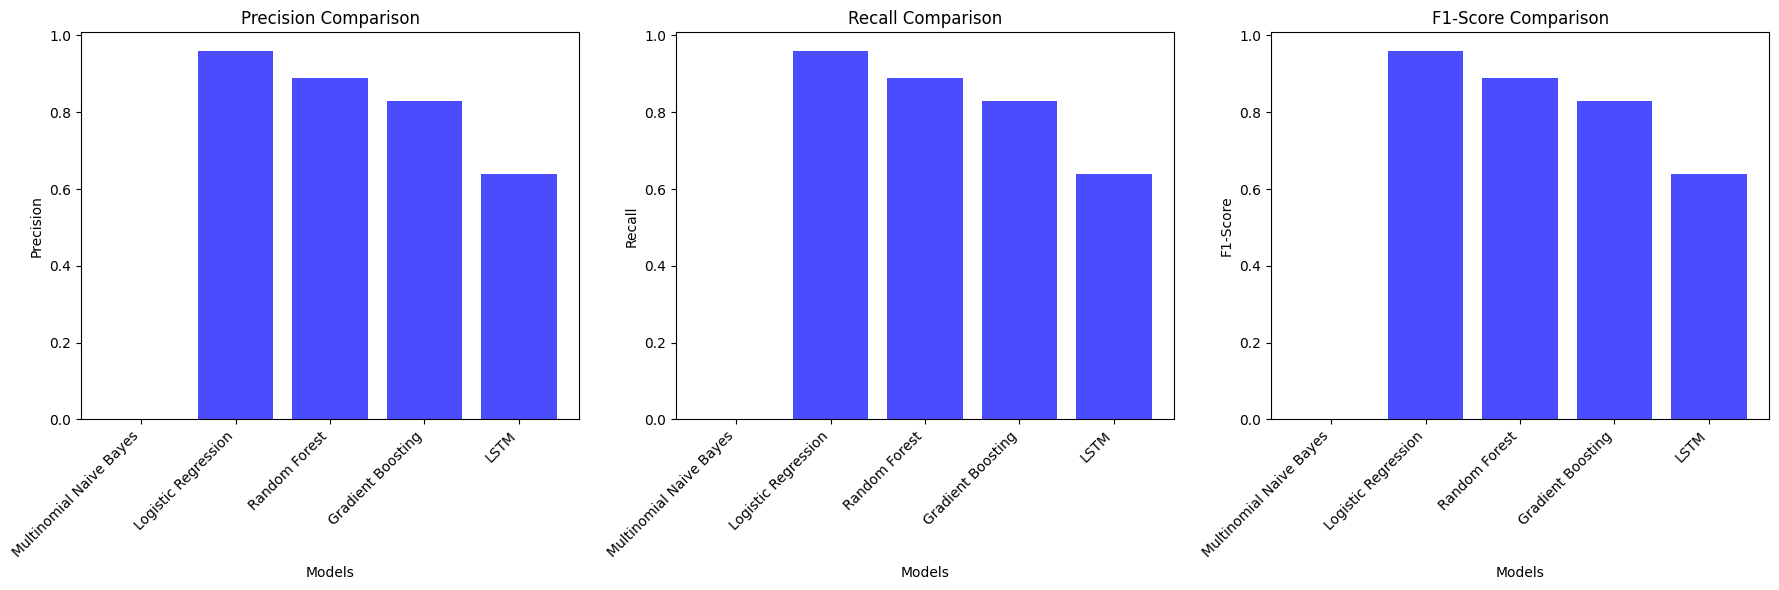

In [49]:
# Data extracted from classification reports
model_names = [
    "Multinomial Naive Bayes",
    "Logistic Regression",
    "Random Forest",
    "Gradient Boosting",
    "LSTM"
]

# Precision, Recall, F1-Score for each class (Negative, Neutral, Positive)
metrics = {
    "Negative": {
        "Multinomial Naive Bayes": 0.0, "Logistic Regression": 0.96, "Random Forest": 0.89,
        "Gradient Boosting": 0.83, "LSTM": 0.64
    },
    "Neutral": {
        "Multinomial Naive Bayes": 0.0, "Logistic Regression": 0.0, "Random Forest": 1.0,
        "Gradient Boosting": 0.20, "LSTM": 0.27
    },
    "Positive": {
        "Multinomial Naive Bayes": 0.89, "Logistic Regression": 0.91, "Random Forest": 0.91,
        "Gradient Boosting": 0.91, "LSTM": 0.90
    }
}

# Create subplots for precision, recall, and F1-score
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# List of metrics to plot
metric_names = ['Precision', 'Recall', 'F1-Score']
metric_data = {
    'Precision': metrics['Negative'],
    'Recall': metrics['Neutral'],
    'F1-Score': metrics['Positive']
}

# Plot each metric (Precision, Recall, F1-Score)
for idx, metric in enumerate(metric_names):
    ax = axes[idx]
    values = [metrics['Negative'][model] for model in model_names]
    ax.bar(model_names, values, color='blue', alpha=0.7)
    ax.set_title(f'{metric} Comparison')
    ax.set_xlabel('Models')
    ax.set_ylabel(metric)
    ax.set_xticklabels(model_names, rotation=45, ha='right')

# Adjust layout for better visualization
plt.tight_layout()
plt.show()

## Deep Learning Model

In [50]:
# Text preprocessing
from tensorflow.keras.preprocessing.text import Tokenizer
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
# Convert Score to sentiment labels
def categorize_sentiment(score):
    if score in [1, 2]:
        return 'Negative'
    elif score == 3:
        return 'Neutral'
    else:
        return 'Positive'

df['Sentiment'] = df['Score'].apply(categorize_sentiment)

# Encode labels (Negative: 0, Neutral: 1, Positive: 2)
label_encoder = LabelEncoder()
df['Sentiment'] = label_encoder.fit_transform(df['Sentiment'])

# Text preprocessing
tokenizer = Tokenizer(num_words=10000)  # Limit vocabulary
tokenizer.fit_on_texts(df['Text'])
sequences = tokenizer.texts_to_sequences(df['Text'])
X = pad_sequences(sequences, maxlen=150)  # Shorter sequence length

# Define target variable (One-hot encoding)
y = tf.keras.utils.to_categorical(df['Sentiment'])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build Optimized LSTM Model
model = Sequential([
    Embedding(input_dim=10000, output_dim=64, input_length=150),
    LSTM(64, return_sequences=True),
    Dropout(0.3),
    LSTM(32),
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dense(y.shape[1], activation='softmax')
])

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train model
model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))

# Predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Evaluation Metrics
accuracy = accuracy_score(y_test_classes, y_pred_classes)
kappa = cohen_kappa_score(y_test_classes, y_pred_classes)
print(f"Accuracy: {accuracy:.4f}")
print(f"Cohen's Kappa Score: {kappa:.4f}")
print("Classification Report:\n", classification_report(y_test_classes, y_pred_classes, target_names=['Negative', 'Neutral', 'Positive']))


Epoch 1/5
307/307 ━━━━━━━━━━━━━━━━━━━━ 66s 199ms/step - accuracy: 0.7668 - loss: 0.7075 - val_accuracy: 0.8222 - val_loss: 0.4710
Epoch 2/5
307/307 ━━━━━━━━━━━━━━━━━━━━ 61s 198ms/step - accuracy: 0.8434 - loss: 0.4153 - val_accuracy: 0.8287 - val_loss: 0.4562
Epoch 3/5
307/307 ━━━━━━━━━━━━━━━━━━━━ 81s 196ms/step - accuracy: 0.8721 - loss: 0.3417 - val_accuracy: 0.8379 - val_loss: 0.4681
Epoch 4/5
307/307 ━━━━━━━━━━━━━━━━━━━━ 62s 203ms/step - accuracy: 0.9028 - loss: 0.2632 - val_accuracy: 0.8124 - val_loss: 0.5783
Epoch 5/5
307/307 ━━━━━━━━━━━━━━━━━━━━ 60s 196ms/step - accuracy: 0.9215 - loss: 0.2121 - val_accuracy: 0.8120 - val_loss: 0.5404
154/154 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step
Accuracy: 0.8120
Cohen's Kappa Score: 0.5253
Classification Report:
               precision    recall  f1-score   support

    Negative       0.62      0.67      0.64       740
     Neutral       0.29      0.30      0.30       419
    Positive       0.91      0.90      0.91      3746

    accuracy         